In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from camvid_dataset import dataset

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from camvid_dataset import dataset, random_crop
from camvid_utils import load_label_colors 
from camvid_utils import show_image_row, color_label, unnormalize_image

In [3]:
label_colors_path = './camvid/label_colors.txt'
label_colors, _, _ = load_label_colors(label_colors_path)

(224, 224, 3) (50176,)


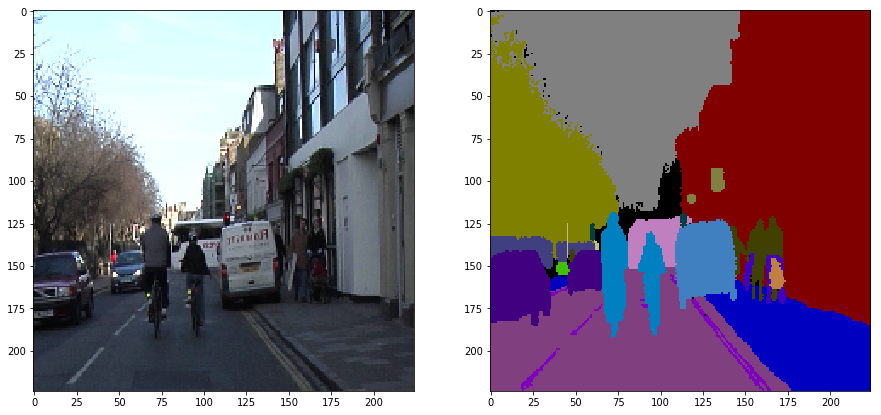

(224, 224, 3) (50176,)


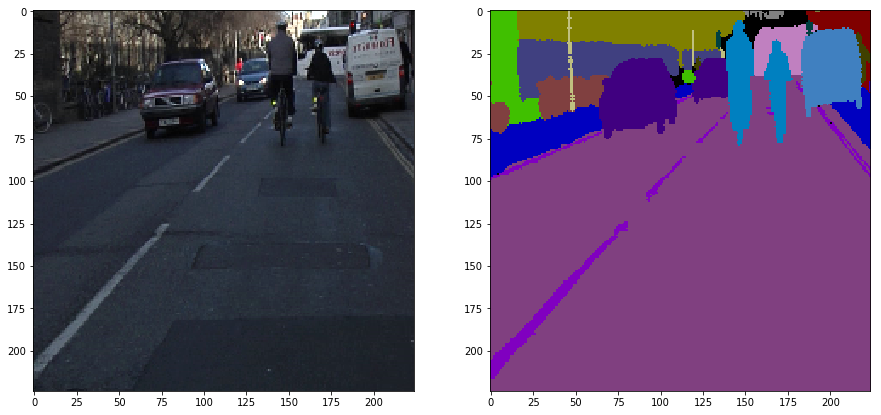

(224, 224, 3) (50176,)


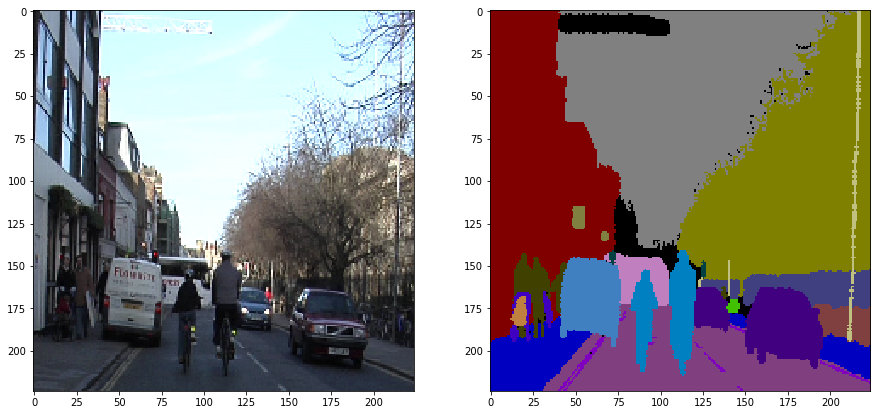

(224, 224, 3) (50176,)


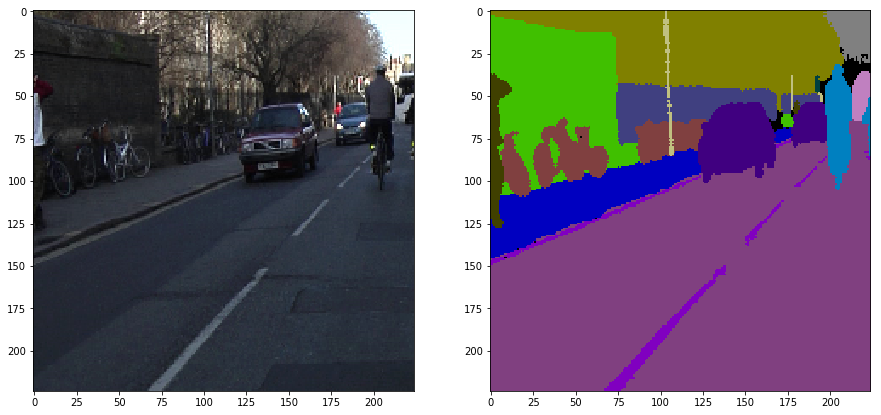

(224, 224, 3) (50176,)


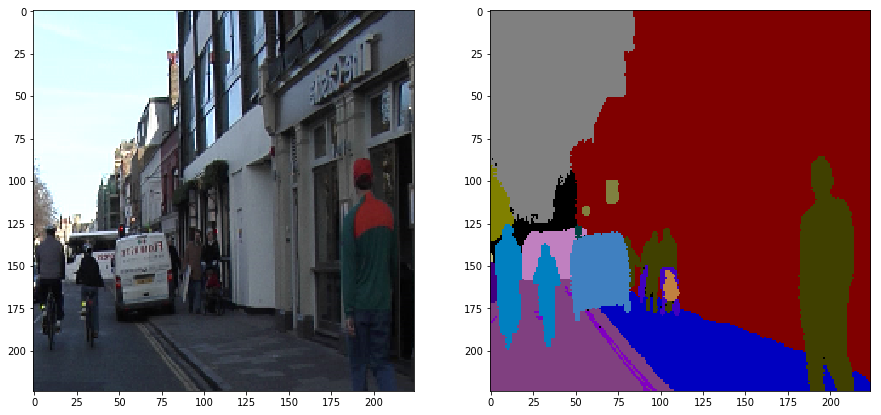

In [4]:
input_path = '/tmp/camvid-preprocessed/camvid-384x480-train.tfrecords'
ds = dataset(input_path)
ds = ds.take(1)
ds = ds.flat_map(random_crop(nb_crops=5, random_flip=True, crop_height=224, crop_width=224))
iterator = ds.make_one_shot_iterator()
next_element = iterator.get_next()

images = []
labels = []
with tf.Session() as sess:
    while True:
        try:
            image, label = sess.run(next_element)
            images.append(image)
            labels.append(label)
        except tf.errors.OutOfRangeError:
            break
            
for i in range(len(images)):
    print(images[i].shape, labels[i].shape)
    image = unnormalize_image(images[i])    
    label = labels[i].reshape((image.shape[0],image.shape[1]))
    label = color_label(label, label_colors)
    show_image_row([image, label])
    plt.show()
